# Homework exercise 2
## Deadline: upload to Moodle by 22 March 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name 1:__ Frank Kolesik

__Name 2:__ Johanna Fritz

__Name 3:__ Tobias Forster


The name of the file that you upload should be named *Homework2_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 23 March to earn points for this homework exercise unless you have a valid reason for your absence.

You are allowed to work on this exercise in groups of up to three students. If any part of the questions is unclear, please ask on the Moodle forum.

#### Rebalancing portfolios
In this exercise, you are asked to look at the effects of periodically rebalancing portfolios. We define rebalancing here to mean an adjustment to the portfolio weights back to their target weights after differences in returns achieved by different assets have led to deviations from those weights. In the example studied in this problem set, the target portfolio will be equal-weighted, i.e., the target weight of each asset in a portfolio consisting of $N$ assets will be $\frac{1}{N}$.

1. To prepare the subsequent analyses, please create simulated returns as follows. There are 100 assets and 10000 (corresponding to about 40 years) logarithmic daily returns for each of these assets. Returns follow a multivariate normal distribution with expected log returns of 0.05% and a daily standard deviation of log returns of 2% (which is similar to historical real stock returns; thus we will henceforth refer to the assets as stocks). We will assume that pairwise correlations of returns between different stocks are identical for all pairs of stocks. Please create one numpy array each for pairwise correlations equal to 0.5 and 0. In subsequent questions, you are expected to always use each of these arrays, which allows you to compare results later.

In [1]:
import numpy as np  
np.random.seed(321)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
asset_count = 100
days = 10_000
std = 0.02
mean = 0.0005

# 1 if i==j, else 0, i,j=0,1,...99 (asset_count-1) [identity matrix]
cor1 = np.identity(asset_count)
# 1 if i==j, else 0.5, i,j=0,1,...99 (asset_count-1)
cor2 = np.full((asset_count, asset_count), 0.5) + (np.identity(asset_count)*0.5) 

log_returns1 = np.random.multivariate_normal(np.zeros(asset_count), cor1, days) * std + mean
log_returns2 = np.random.multivariate_normal(np.zeros(asset_count), cor2, days) * std + mean

exp_returns1 = np.exp(log_returns1)
exp_returns2 = np.exp(log_returns2)
exp_returns1_prod = np.cumprod(exp_returns1, axis = 0)
exp_returns2_prod = np.cumprod(exp_returns2, axis = 0)

2. For each of these arrays, plot the return time series generate above for five stocks randomly chosen among the 100 stocks contained in the array.

Text(0, 0.5, 'Return')

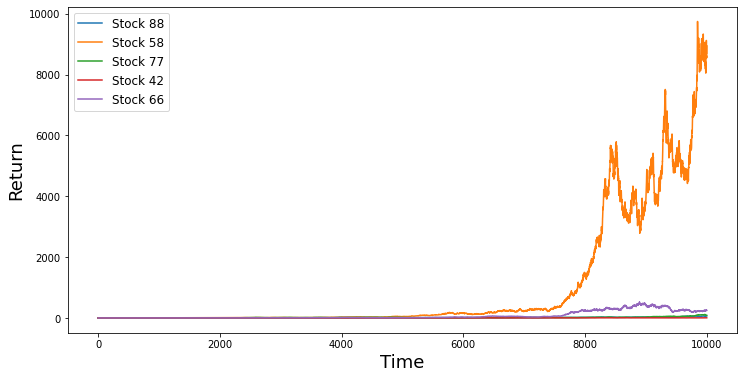

In [3]:
random_nums = np.random.choice(range(asset_count), 5, replace=False)

five_stocks1 = exp_returns1_prod[:,random_nums]

plt.figure(figsize=(12,6))

graph = plt.plot(five_stocks1)
labels = ['Stock '+str(i+1) for i in random_nums]
plt.legend(graph, labels, fontsize = 12)

plt.xlabel('Time', fontsize=18)
plt.ylabel('Return', fontsize=18)

Text(0, 0.5, 'Return')

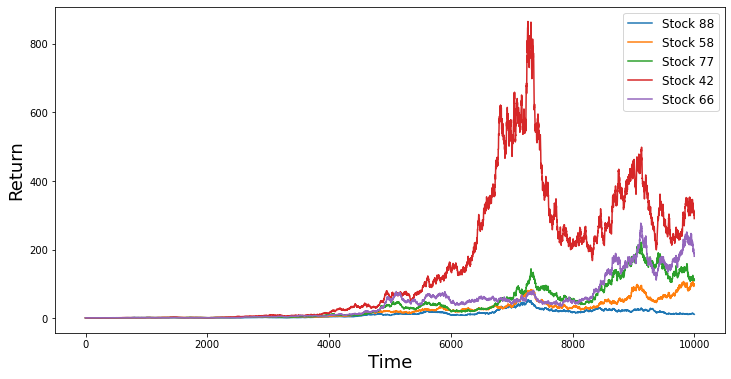

In [4]:
five_stocks2 = exp_returns2_prod[:,random_nums]

plt.figure(figsize=(12,6))

graph = plt.plot(five_stocks2)
labels = ['Stock '+str(i+1) for i in random_nums]
plt.legend(graph, labels, fontsize = 12)

plt.xlabel('Time', fontsize=18)
plt.ylabel('Return', fontsize=18)

3. Compute the cumulative returns for each array and plot cumulative returns for the same stocks as in the previous question.

Text(0, 0.5, 'Cumulative Return')

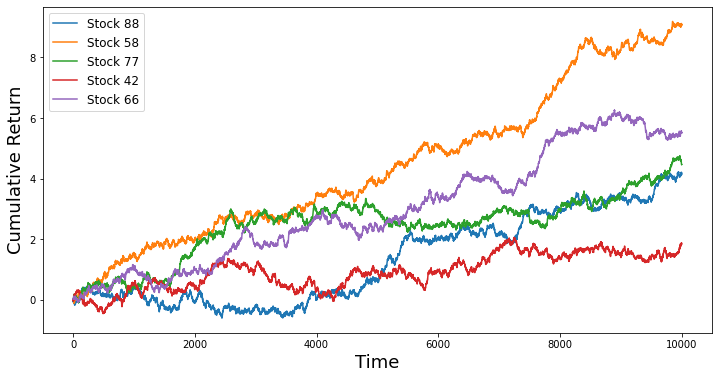

In [5]:
# exp_returns1 - 1 or log_returns1
cumul_returns1 = np.cumsum(log_returns1, axis = 0)
five_stocks_cumul1 = cumul_returns1[:,random_nums]

plt.figure(figsize=(12,6))

graph = plt.plot(five_stocks_cumul1)
labels = ['Stock '+str(i+1) for i in random_nums]
plt.legend(graph, labels, fontsize = 12)

plt.xlabel('Time', fontsize=18)
plt.ylabel('Cumulative Return', fontsize=18)

Text(0, 0.5, 'Cumulative Return')

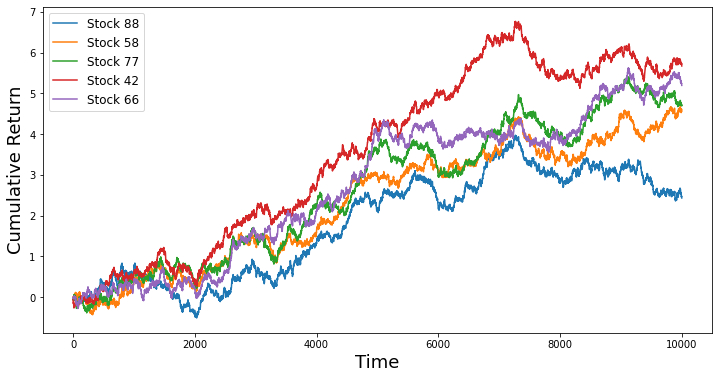

In [6]:
# exp_returns2 - 1 or log_returns2
cumul_returns2 = np.cumsum(log_returns2, axis = 0)
five_stocks_cumul2 = cumul_returns2[:,random_nums]

plt.figure(figsize=(12,6))

graph = plt.plot(five_stocks_cumul2)
labels = ['Stock '+str(i+1) for i in random_nums]
plt.legend(graph, labels, fontsize = 12)

plt.xlabel('Time', fontsize=18)
plt.ylabel('Cumulative Return', fontsize=18)

4. As a benchmark compared to the rebalanced portfolios considered afterwards, consider buy and hold portfolios investing equal amounts in each asset at the beginning and never adjusting the portfolio. To be able to understand the effect of diversification on the potential benefits of rebalancing, you are asked to consider portfolios comprising 2 and 10 stocks, respectively. For each of those two cases,

* create 100 portfolios of stocks randomly chosen among those contained in the respective array
* for each portfolio, compute the average log return
* assume you invest €1000000 in each portfolio. Compute the final values, the mean and the standard deviation of the final values

In [7]:
# needed variables
port_count = 100
capital = 1_000_000
stock_count_2 = 2
stock_count_10 = 10

# invest per stock
invest_1 = capital / stock_count_2
invest_2 = capital / stock_count_10



# return matrix: rows ... different days, columns ... different stocks
# random stocks from the previous calculated stock returns
port_2_1 = [ log_returns1[:, np.random.choice(range(port_count), stock_count_2, replace=False) ] for _ in range(port_count) ]
port_2_2 = [ log_returns2[:, np.random.choice(range(port_count), stock_count_2, replace=False) ] for _ in range(port_count) ]
port_10_1 = [ log_returns1[:, np.random.choice(range(port_count), stock_count_10, replace=False) ] for _ in range(port_count) ]
port_10_2 = [ log_returns2[:, np.random.choice(range(port_count), stock_count_10, replace=False) ] for _ in range(port_count) ]


# avg log return for each portfolio (next 2 lines are the long version of the calculation) --- as expected round about 0.0005
# port_2_1_avg1 = [ (np.cumsum(port, axis = 0)[-1] / 10_000) for port in port_2_1 ]
# port_2_1_avg2 = [ np.mean(port) for port in port_2_1_avg1 ]
#
# port_2_1_avg = [ np.mean(i) for i in port_2_1 ]
# port_2_2_avg = [ np.mean(i) for i in port_2_2 ]
# port_10_1_avg = [ np.mean(i) for i in port_10_1 ]
# port_10_2_avg = [ np.mean(i) for i in port_10_2 ]


# final values per portfolio
# port_2_1_final = [ sum( (np.cumsum(port_2_1[i], axis = 0)[-1] + np.ones(stock_count_2)) * invest_1 ) for i in range(port_count) ]
# port_2_2_final = [ sum( (np.cumsum(port_2_2[i], axis = 0)[-1] + np.ones(stock_count_2)) * invest_1 ) for i in range(port_count) ]
# port_10_1_final = [ sum( (np.cumsum(port_10_1[i], axis = 0)[-1] + np.ones(stock_count_10)) * invest_2 ) for i in range(port_count) ]
# port_10_2_final = [ sum( (np.cumsum(port_10_2[i], axis = 0)[-1] + np.ones(stock_count_10)) * invest_2 ) for i in range(port_count) ]
### or exp
port_2_1_final = [ sum( np.exp(np.cumsum(port_2_1[i], axis = 0)[-1]) * invest_1 ) for i in range(port_count) ]
port_2_2_final = [ sum( np.exp(np.cumsum(port_2_2[i], axis = 0)[-1]) * invest_1 ) for i in range(port_count) ]
port_10_1_final = [ sum( np.exp(np.cumsum(port_10_1[i], axis = 0)[-1]) * invest_2 ) for i in range(port_count) ]
port_10_2_final = [ sum( np.exp(np.cumsum(port_10_2[i], axis = 0)[-1]) * invest_2 ) for i in range(port_count) ]

# log return for each poprtfolio
# port_2_1_avg = [ (val / capital) - 1 for val in port_2_1_final ]
# port_2_2_avg = [ (val / capital) - 1 for val in port_2_2_final ]
# port_10_1_avg = [ (val / capital) - 1 for val in port_10_1_final ]
# port_10_2_avg = [ (val / capital) - 1 for val in port_10_2_final ]
### or log
port_2_1_avg = [ np.log(val / capital) for val in port_2_1_final ]
port_2_2_avg = [ np.log(val / capital) for val in port_2_2_final ]
port_10_1_avg = [ np.log(val / capital) for val in port_10_1_final ]
port_10_2_avg = [ np.log(val / capital) for val in port_10_2_final ]

print("(1) mean:", np.mean(port_2_1_final), "- standard deviation:", np.std(port_2_1_final), "- avg log return:", np.mean(port_2_1_avg))
print("(2) mean:", np.mean(port_2_2_final), "- standard deviation:", np.std(port_2_2_final), "- avg log return:", np.mean(port_2_2_avg))
print("(3) mean:", np.mean(port_10_1_final), "- standard deviation:", np.std(port_10_1_final), "- avg log return:", np.mean(port_10_1_avg))
print("(4) mean:", np.mean(port_10_2_final), "- standard deviation:", np.std(port_10_2_final), "- avg log return:", np.mean(port_10_2_avg))

(1) mean: 712405025.95334 - standard deviation: 1481091807.809535 - avg log return: 5.547532376758229
(2) mean: 238185223.4212096 - standard deviation: 550758274.7197373 - avg log return: 4.947780145878224
(3) mean: 634404914.755659 - standard deviation: 547269910.1250721 - avg log return: 6.100710456796909
(4) mean: 293222991.34916216 - standard deviation: 288122641.99327093 - avg log return: 5.387871603564086


5. Consider the same initial portfolios as in the previous question. However, instead of leaving the portfolio unchanged, assume the portfolio is rebalanced either

* every day
* or every 100 days

For these two cases, again

* for each portfolio, compute the average log return
* assume you invest €1000000 in each portfolio. Compute the final values, the mean and the standard deviation of the final values


In [8]:
def rebalance(portfolios, step):
    asset_count = len(portfolios[0][0])
    indices = np.arange(step-1, len(portfolios[0]) , step)
#     print(len(indices), indices)
    final_values = []
    for portfolio in portfolios:
        value = capital
        sums = [ np.cumsum(portfolio[ (index-step+1) : (index+1) ], axis = 0)[-1] for index in indices ]
#         print(np.mean(sums), len(sums))
        for i in range(len(indices)):
#             value = sum( (sums[i] + np.ones(asset_count)) * (value / asset_count) )
            value = sum( np.exp(sums[i]) * (value / asset_count) )
        final_values.append(value)
    return final_values

In [9]:
days_1 = 1
days_2 = 100

# portfolio with 2 assets
port_2_1_rebalanced_1 = rebalance(port_2_1, days_1)
port_2_2_rebalanced_1 = rebalance(port_2_2, days_1)
port_2_1_rebalanced_100 = rebalance(port_2_1, days_2)
port_2_2_rebalanced_100 = rebalance(port_2_2, days_2)

# log return for each poprtfolio
# port_2_1_rebalanced_1_avg = [ (val / capital) - 1 for val in port_2_1_rebalanced_1 ]
# port_2_2_rebalanced_1_avg = [ (val / capital) - 1 for val in port_2_2_rebalanced_1 ]
# port_2_1_rebalanced_100_avg = [ (val / capital) - 1 for val in port_2_1_rebalanced_100 ]
# port_2_2_rebalanced_100_avg = [ (val / capital) - 1 for val in port_2_2_rebalanced_100 ]
### or log
port_2_1_rebalanced_1_avg = [ np.log(val / capital) for val in port_2_1_rebalanced_1 ]
port_2_2_rebalanced_1_avg = [ np.log(val / capital) for val in port_2_2_rebalanced_1 ]
port_2_1_rebalanced_100_avg = [ np.log(val / capital) for val in port_2_1_rebalanced_100 ]
port_2_2_rebalanced_100_avg = [ np.log(val / capital) for val in port_2_2_rebalanced_100 ]

print("(1) mean:", np.mean(port_2_1_rebalanced_1), "- standard deviation:", np.std(port_2_1_rebalanced_1), "- avg log return:", np.mean(port_2_1_rebalanced_1_avg))
print("(2) mean:", np.mean(port_2_2_rebalanced_1), "- standard deviation:", np.std(port_2_2_rebalanced_1), "- avg log return:", np.mean(port_2_2_rebalanced_1_avg))
print("(3) mean:", np.mean(port_2_1_rebalanced_100), "- standard deviation:", np.std(port_2_1_rebalanced_100), "- avg log return:", np.mean(port_2_1_rebalanced_100_avg))
print("(4) mean:", np.mean(port_2_2_rebalanced_100), "- standard deviation:", np.std(port_2_2_rebalanced_100), "- avg log return:", np.mean(port_2_2_rebalanced_100_avg))

(1) mean: 823402369.2036073 - standard deviation: 1146362673.2786257 - avg log return: 6.084625595914827
(2) mean: 247734298.33982554 - standard deviation: 368716844.59019935 - avg log return: 5.112883477686572
(3) mean: 821678665.881147 - standard deviation: 1252727127.3047366 - avg log return: 6.055699536061737
(4) mean: 253521808.27973437 - standard deviation: 417591366.0486506 - avg log return: 5.113734557825107


In [10]:
# portfolio with 10 assets
port_10_1_rebalanced_1 = rebalance(port_10_1, days_1)
port_10_2_rebalanced_1 = rebalance(port_10_2, days_1)
port_10_1_rebalanced_100 = rebalance(port_10_1, days_2)
port_10_2_rebalanced_100 = rebalance(port_10_2, days_2)

# log return for each poprtfolio
# port_10_1_rebalanced_1_avg = [ (val / capital) - 1 for val in port_10_1_rebalanced_1 ]
# port_10_2_rebalanced_1_avg = [ (val / capital) - 1 for val in port_10_2_rebalanced_1 ]
# port_10_1_rebalanced_100_avg = [ (val / capital) - 1 for val in port_10_1_rebalanced_100 ]
# port_10_2_rebalanced_100_avg = [ (val / capital) - 1 for val in port_10_2_rebalanced_100 ]
### or log
port_10_1_rebalanced_1_avg = [ np.log(val / capital) for val in port_10_1_rebalanced_1 ]
port_10_2_rebalanced_1_avg = [ np.log(val / capital) for val in port_10_2_rebalanced_1 ]
port_10_1_rebalanced_100_avg = [ np.log(val / capital) for val in port_10_1_rebalanced_100 ]
port_10_2_rebalanced_100_avg = [ np.log(val / capital) for val in port_10_2_rebalanced_100 ]

print("(1) mean:", np.mean(port_10_1_rebalanced_1), "- standard deviation:", np.std(port_10_1_rebalanced_1), "- avg log return:", np.mean(port_10_1_rebalanced_1_avg))
print("(2) mean:", np.mean(port_10_2_rebalanced_1), "- standard deviation:", np.std(port_10_2_rebalanced_1), "- avg log return:", np.mean(port_10_2_rebalanced_1_avg))
print("(3) mean:", np.mean(port_10_1_rebalanced_100), "- standard deviation:", np.std(port_10_1_rebalanced_100), "- avg log return:", np.mean(port_10_1_rebalanced_100_avg))
print("(4) mean:", np.mean(port_10_2_rebalanced_100), "- standard deviation:", np.std(port_10_2_rebalanced_100), "- avg log return:", np.mean(port_10_2_rebalanced_100_avg))

(1) mean: 958888878.0735631 - standard deviation: 489045501.51184285 - avg log return: 6.73148145888283
(2) mean: 279213709.89649874 - standard deviation: 105185527.5775267 - avg log return: 5.561315189321869
(3) mean: 953872792.1227906 - standard deviation: 504221933.2402753 - avg log return: 6.717965056590697
(4) mean: 274362887.3588505 - standard deviation: 105287750.95260607 - avg log return: 5.5420940498513565


6. Plot the distributions of final values computed in 4. and 5.

(array([88.,  2.,  1.,  2.,  3.,  2.,  0.,  0.,  0.,  2.]),
 array([9.632e+06, 8.879e+08, 1.766e+09, 2.644e+09, 3.523e+09, 4.401e+09,
        5.279e+09, 6.157e+09, 7.036e+09, 7.914e+09, 8.792e+09]),
 <BarContainer object of 10 artists>)

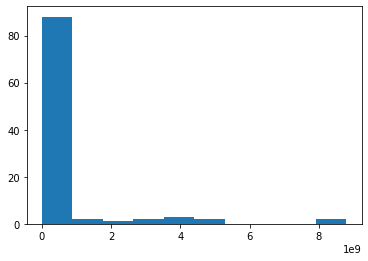

In [11]:
# plot: exercise 4
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_2_1_final)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

# import matplotlib.pyplot as plt
plt.hist(port_2_1_final)

(array([96.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.693e+07, 5.560e+08, 1.095e+09, 1.634e+09, 2.173e+09, 2.712e+09,
        3.251e+09, 3.791e+09, 4.330e+09, 4.869e+09, 5.408e+09]),
 <BarContainer object of 10 artists>)

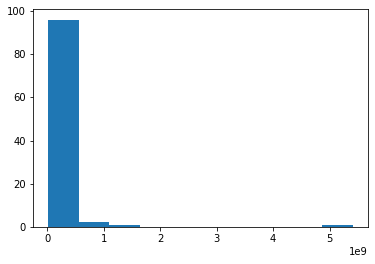

In [12]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_2_2_final)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_2_2_final)

(array([40., 23.,  6., 11., 10.,  2.,  2.,  4.,  0.,  2.]),
 array([6.653e+07, 3.174e+08, 5.683e+08, 8.192e+08, 1.070e+09, 1.321e+09,
        1.572e+09, 1.823e+09, 2.074e+09, 2.324e+09, 2.575e+09]),
 <BarContainer object of 10 artists>)

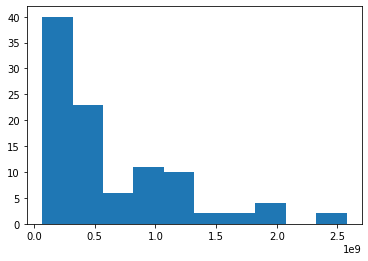

In [13]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_10_1_final)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_10_1_final)

(array([56., 18., 13.,  5.,  0.,  0.,  0.,  0.,  7.,  1.]),
 array([7.204e+07, 1.996e+08, 3.271e+08, 4.547e+08, 5.822e+08, 7.098e+08,
        8.373e+08, 9.649e+08, 1.092e+09, 1.220e+09, 1.348e+09]),
 <BarContainer object of 10 artists>)

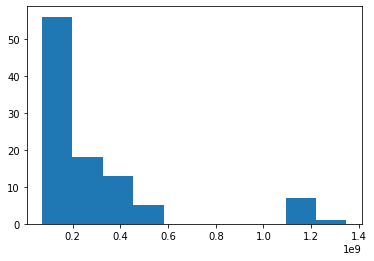

In [14]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_10_2_final)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_10_2_final)

(array([70., 16., 10.,  1.,  2.,  0.,  0.,  0.,  0.,  1.]),
 array([2.558e+07, 8.903e+08, 1.755e+09, 2.620e+09, 3.485e+09, 4.349e+09,
        5.214e+09, 6.079e+09, 6.944e+09, 7.809e+09, 8.673e+09]),
 <BarContainer object of 10 artists>)

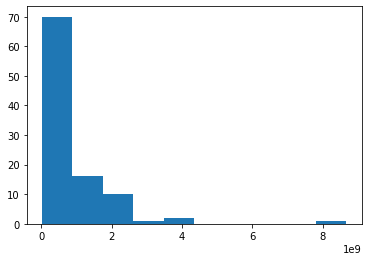

In [15]:
# plot: exercise 5 - 2 assets
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_2_1_rebalanced_1)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_2_1_rebalanced_1)

(array([85., 12.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([2.806e+07, 3.636e+08, 6.992e+08, 1.035e+09, 1.370e+09, 1.706e+09,
        2.041e+09, 2.377e+09, 2.712e+09, 3.048e+09, 3.384e+09]),
 <BarContainer object of 10 artists>)

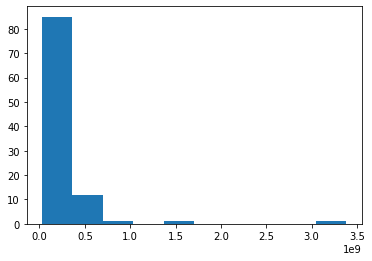

In [16]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_2_2_rebalanced_1)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_2_2_rebalanced_1)

(array([77., 16.,  4.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([2.406e+07, 1.067e+09, 2.109e+09, 3.152e+09, 4.194e+09, 5.237e+09,
        6.279e+09, 7.322e+09, 8.365e+09, 9.407e+09, 1.045e+10]),
 <BarContainer object of 10 artists>)

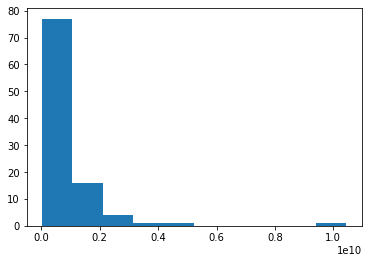

In [17]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_2_1_rebalanced_100)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_2_1_rebalanced_100)

(array([91.,  6.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.455e+07, 4.141e+08, 8.036e+08, 1.193e+09, 1.583e+09, 1.972e+09,
        2.362e+09, 2.751e+09, 3.141e+09, 3.530e+09, 3.920e+09]),
 <BarContainer object of 10 artists>)

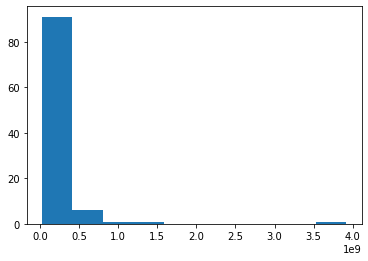

In [18]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_2_2_rebalanced_100)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_2_2_rebalanced_100)

(array([12., 15., 20., 17., 11.,  7.,  5.,  5.,  4.,  4.]),
 array([2.154e+08, 4.162e+08, 6.171e+08, 8.180e+08, 1.019e+09, 1.220e+09,
        1.421e+09, 1.621e+09, 1.822e+09, 2.023e+09, 2.224e+09]),
 <BarContainer object of 10 artists>)

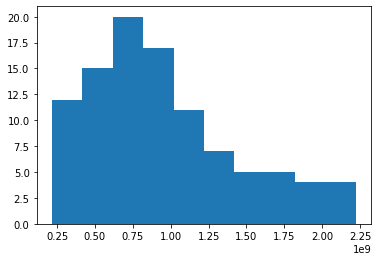

In [19]:
# plot: exercise 5 - 10 assets
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_10_1_rebalanced_1)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_10_1_rebalanced_1)

(array([ 7., 13., 21., 17., 17.,  6.,  4.,  7.,  5.,  3.]),
 array([1.039e+08, 1.483e+08, 1.926e+08, 2.370e+08, 2.814e+08, 3.257e+08,
        3.701e+08, 4.145e+08, 4.588e+08, 5.032e+08, 5.476e+08]),
 <BarContainer object of 10 artists>)

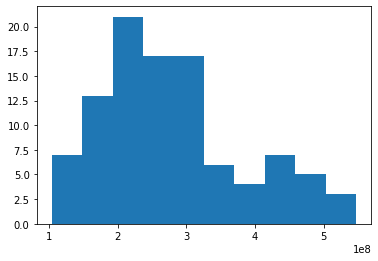

In [20]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_10_2_rebalanced_1)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_10_2_rebalanced_1)

(array([17., 19., 19., 15.,  9.,  8.,  6.,  4.,  2.,  1.]),
 array([2.173e+08, 4.506e+08, 6.838e+08, 9.171e+08, 1.150e+09, 1.384e+09,
        1.617e+09, 1.850e+09, 2.083e+09, 2.317e+09, 2.550e+09]),
 <BarContainer object of 10 artists>)

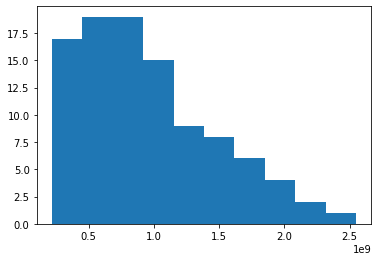

In [21]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_10_1_rebalanced_100)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_10_1_rebalanced_100)

(array([ 8., 12., 24., 14., 16.,  8.,  2.,  4.,  8.,  4.]),
 array([1.036e+08, 1.465e+08, 1.894e+08, 2.323e+08, 2.752e+08, 3.181e+08,
        3.610e+08, 4.039e+08, 4.468e+08, 4.897e+08, 5.326e+08]),
 <BarContainer object of 10 artists>)

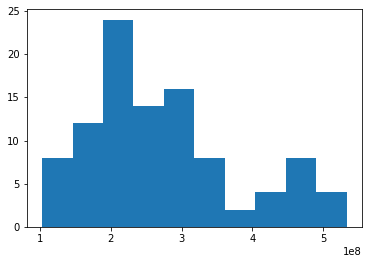

In [22]:
# plt.figure(figsize=(12,6))
# graph = plt.plot(port_10_2_rebalanced_100)
# plt.xlabel('Portfolio', fontsize=18)
# plt.ylabel('Final Value', fontsize=18)

plt.hist(port_10_2_rebalanced_100)

Ungraded non-programming question: In which circumstances does rebalancing pay off? What are advantages and disadvantags to rebalancing?

__If there is a lot of risk in the market, rebalancing pay off ("don't put all your eggs in one basket").__

__Disadvantages are transaction costs and taxes. Furthermore, fundamental aspects doesn't play a role in buying and selling these stocks. One advantage is that risk is better diversified.__